In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgbm
import catboost as catb

#### Пути к файлам

In [3]:
INPUT_TRAIN_PATH = 'D:/GeekBrains/ds_python_libs2/final/course_project_train.csv'
INPUT_TEST_PATH = 'D:/GeekBrains/ds_python_libs2/final/course_project_test.csv'
OUTPUTH_PATH = 'D:/GeekBrains/ds_python_libs2/final/OSnetkova_predictions.csv'

**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые льготы
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

#### Загрузка данных

In [4]:
df_train = pd.read_csv(INPUT_TRAIN_PATH)
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [5]:
df_train.shape

(7500, 17)

In [6]:
df_test = pd.read_csv(INPUT_TEST_PATH)
df_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [7]:
df_test.shape

(2500, 16)

# EDA

In [8]:
df_train['Credit Default'].value_counts(normalize=True)

0    0.718267
1    0.281733
Name: Credit Default, dtype: float64

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [10]:
df_train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [11]:
(df_train['Annual Income'].isna() == df_train['Credit Score'].isna()).sum()

7500

In [12]:
(df_test['Annual Income'].isna() == df_test['Credit Score'].isna()).sum()

2500

In [13]:
np.corrcoef(df_train.loc[df_train['Annual Income'].isna() == False, 'Annual Income'], df_train.loc[df_train['Credit Score'].isna() == False, 'Credit Score'])

array([[ 1.        , -0.03783175],
       [-0.03783175,  1.        ]])

In [14]:
np.corrcoef(df_test.loc[df_test['Annual Income'].isna() == False, 'Annual Income'], df_test.loc[df_test['Credit Score'].isna() == False, 'Credit Score'])

array([[ 1.        , -0.04685602],
       [-0.04685602,  1.        ]])

Nan значения у Annual Income и Credit Score полностью совпадают, но корреляции нет. Возможно, кредитный скор невозможно посчитать без знания годового дохода, но размер дохода и скоринг при этом независимы

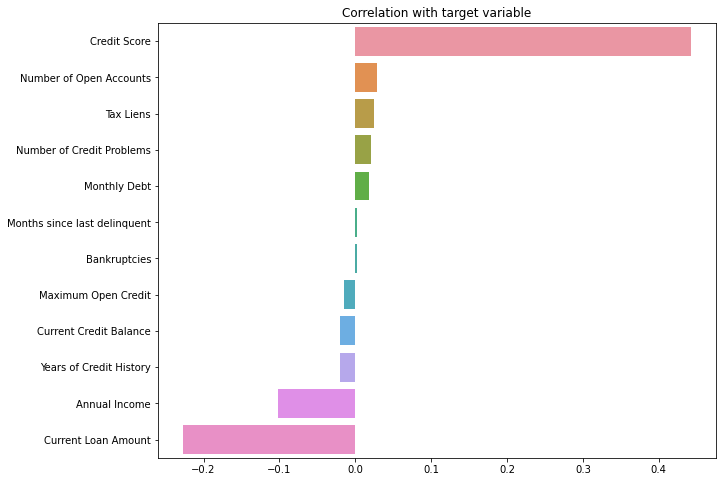

In [15]:
corr_with_target = df_train[df_train.columns.drop('Credit Default').tolist() + ['Credit Default']].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title('Correlation with target variable');

Наиболее коррелируют с целевой переменной Credit Score, Annual Income и Current Load Amount

In [16]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [17]:
confusion_matrix_purpose = pd.crosstab(df_train['Purpose'], df_train['Credit Default'])
confusion_matrix_homeownership = pd.crosstab(df_train['Home Ownership'], df_train['Credit Default'])
confusion_matrix_jobyears = pd.crosstab(df_train['Years in current job'], df_train['Credit Default'])
confusion_matrix_term = pd.crosstab(df_train['Term'], df_train['Credit Default'])


In [18]:
cramers_v(confusion_matrix_purpose), cramers_v(confusion_matrix_homeownership), cramers_v(confusion_matrix_jobyears), cramers_v(confusion_matrix_term)

(0.04956346808303591, 0.06332799061940161, 0.0, 0.18079272505856786)

**to do**

* **Home Ownership** - dummy
* **Annual Income** - Nan 
* **Years in current job** - убираем year, 10+ -> 10, <1 -> 0, Nan
* **Tax Liens** - 
* **Number of Open Accounts** - 
* **Years of Credit History** - 
* **Maximum Open Credit** - 
* **Number of Credit Problems** - 
* **Months since last delinquent** - Nan -> 99999999 (не было проблем)
* **Bankruptcies** - Nan
* **Purpose** - dummy
* **Term** - dummy
* **Current Loan Amount** - 
* **Current Credit Balance** - 
* **Monthly Debt** - ежемесячный долг
* **Credit Score** - убираем лишний 0, Nan

## DATASET PREPARATION

### NaN fill

In [19]:
def nan_fill(X):

    X['Years in current job'] = X['Years in current job'].replace(regex = True, to_replace = r'\W\s\D+$|\s\D+$', value = '').replace('< 1', 0)
    X.loc[X['Years in current job'].isna(), 'Years in current job'] = X['Years in current job'].median()
    X['Years in current job'] = X['Years in current job'].astype('int')

    
    for col in X.select_dtypes(include='object').columns:
        X[col] = X[col].astype('category')

    X.loc[X['Months since last delinquent'].isna(), 'Months since last delinquent'] = 99999999

    X.loc[X['Bankruptcies'].isna(), 'Bankruptcies'] = X['Bankruptcies'].value_counts().idxmax()

    X.loc[X['Credit Score'] > 999, 'Credit Score'] = X.loc[X['Credit Score'] > 1000, 'Credit Score'] // 10
    
    return X

In [20]:
df_train = nan_fill(df_train)
df_test = nan_fill(df_test)

Для заполнения NaN будем использовать IterativeImputer

In [21]:
df_train_cat = df_train.select_dtypes(include='category')
df_test_cat = df_test.select_dtypes(include='category')

df_train_num = df_train.select_dtypes(exclude='category')
df_test_num = df_test.select_dtypes(exclude='category')

In [22]:
imputer = IterativeImputer(max_iter = 100)
imp_arr_train = pd.DataFrame(imputer.fit_transform(df_train_num))
imp_arr_test = pd.DataFrame(imputer.fit_transform(df_test_num))

In [23]:
imp_arr_train.columns = df_train_num.columns
imp_arr_test.columns = df_test_num.columns

In [24]:
df_train = pd.concat([df_train_cat, imp_arr_train], axis = 1)
df_test = pd.concat([df_test_cat, imp_arr_test], axis = 1)

In [25]:
for col in df_test.select_dtypes(include='object').columns:
    df_test[col] = df_test[col].astype('category')
for col in df_train.select_dtypes(include='object').columns:
    df_train[col] = df_train[col].astype('category')

In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Home Ownership                7500 non-null   category
 1   Purpose                       7500 non-null   category
 2   Term                          7500 non-null   category
 3   Annual Income                 7500 non-null   float64 
 4   Years in current job          7500 non-null   float64 
 5   Tax Liens                     7500 non-null   float64 
 6   Number of Open Accounts       7500 non-null   float64 
 7   Years of Credit History       7500 non-null   float64 
 8   Maximum Open Credit           7500 non-null   float64 
 9   Number of Credit Problems     7500 non-null   float64 
 10  Months since last delinquent  7500 non-null   float64 
 11  Bankruptcies                  7500 non-null   float64 
 12  Current Loan Amount           7500 non-null   fl

In [27]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Home Ownership                2500 non-null   category
 1   Purpose                       2500 non-null   category
 2   Term                          2500 non-null   category
 3   Annual Income                 2500 non-null   float64 
 4   Years in current job          2500 non-null   float64 
 5   Tax Liens                     2500 non-null   float64 
 6   Number of Open Accounts       2500 non-null   float64 
 7   Years of Credit History       2500 non-null   float64 
 8   Maximum Open Credit           2500 non-null   float64 
 9   Number of Credit Problems     2500 non-null   float64 
 10  Months since last delinquent  2500 non-null   float64 
 11  Bankruptcies                  2500 non-null   float64 
 12  Current Loan Amount           2500 non-null   fl

In [28]:
df_train.describe()

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,7.500000e+03,7500.000000,7.500000e+03,7.500000e+03,7500.000000,7500.000000,7500.000000
mean,1.364277e+06,5.886267,0.030133,11.130933,18.317467,9.451537e+05,0.170000,5.441335e+07,0.116933,1.187318e+07,2.898332e+05,18314.454133,719.724272,0.281733
std,7.884910e+05,3.529503,0.271604,4.908924,7.041946,1.602622e+07,0.498598,4.980815e+07,0.346904,3.192612e+07,3.178714e+05,11926.764673,25.171378,0.449874
min,1.645970e+05,0.000000,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.743230e+05,3.000000,0.000000,8.000000,13.500000,2.792295e+05,0.000000,3.500000e+01,0.000000,1.801690e+05,1.142565e+05,10067.500000,710.713836,0.000000
50%,1.202706e+06,6.000000,0.000000,10.000000,17.000000,4.781590e+05,0.000000,1.000000e+08,0.000000,3.095730e+05,2.093230e+05,16076.500000,724.000000,0.000000
75%,1.626403e+06,10.000000,0.000000,14.000000,21.800000,7.935015e+05,0.000000,1.000000e+08,0.000000,5.198820e+05,3.604062e+05,23818.000000,738.000000,1.000000
max,1.014934e+07,10.000000,7.000000,43.000000,57.700000,1.304726e+09,7.000000,1.000000e+08,4.000000,1.000000e+08,6.506797e+06,136679.000000,892.918371,1.000000


### Dummies

In [29]:
for cat_colname in df_train.select_dtypes(include='category').columns:
    print(str(cat_colname) + '\n\n' + str(df_train[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64
****************************************************************************************************

Term

Short Term    5556
Long Term     1944
Name: Term, dtype: int64
****************************************************************************************************



In [30]:
purpose_mean_encode = df_train.groupby('Purpose')['Credit Default'].mean()

In [31]:
def dummy_encode(X):
    X['Dummy_Longterm'] = X['Term'].map({'Short Term': 0, 'Long Term': 1}).astype(int)
    X['Dummy_Ownhome'] = X['Home Ownership'].map({'Rent': 0, 'Home Mortgage': 1, 'Have Mortgage': 1, 'Own Home': 2}).astype(int)
    X.loc[:, 'Dummy_Purpose_mean_enc'] = X['Purpose'].map(purpose_mean_encode)
    
    return X

In [32]:
df_train = dummy_encode(df_train)
df_test = dummy_encode(df_test)

In [33]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Home Ownership                2500 non-null   category
 1   Purpose                       2500 non-null   category
 2   Term                          2500 non-null   category
 3   Annual Income                 2500 non-null   float64 
 4   Years in current job          2500 non-null   float64 
 5   Tax Liens                     2500 non-null   float64 
 6   Number of Open Accounts       2500 non-null   float64 
 7   Years of Credit History       2500 non-null   float64 
 8   Maximum Open Credit           2500 non-null   float64 
 9   Number of Credit Problems     2500 non-null   float64 
 10  Months since last delinquent  2500 non-null   float64 
 11  Bankruptcies                  2500 non-null   float64 
 12  Current Loan Amount           2500 non-null   fl

### Feature selection

In [34]:
TARGET_NAME = 'Credit Default'
FEATURE_NAMES = df_train.columns.drop(TARGET_NAME).tolist()

In [35]:
CAT_FEATURE_NAMES = [col for col in df_train.select_dtypes(include='category').columns]
CAT_FEATURE_NAMES

['Home Ownership', 'Purpose', 'Term']

In [36]:
ENCODED_FEATURE_NAMES = [col for col in df_train.columns.drop(TARGET_NAME) if col.find('Dummy_') == False]
ENCODED_FEATURE_NAMES

['Dummy_Longterm', 'Dummy_Ownhome', 'Dummy_Purpose_mean_enc']

In [37]:
NUM_FEATURE_NAMES = [col for col in FEATURE_NAMES if col not in CAT_FEATURE_NAMES + ENCODED_FEATURE_NAMES]
NUM_FEATURE_NAMES

['Annual Income',
 'Years in current job',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score']

### Feature analysis

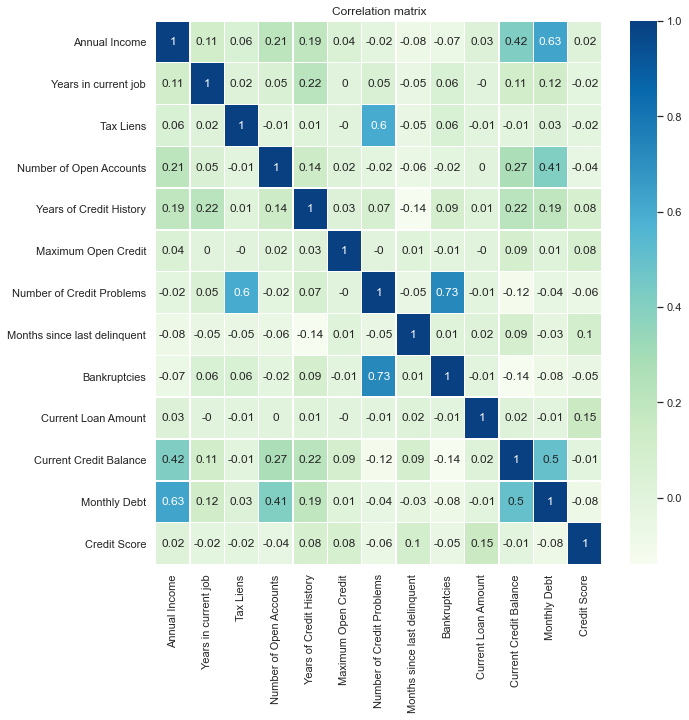

In [38]:
plt.figure(figsize = (10,10))

sns.set(font_scale=1)
sns.heatmap(df_train[NUM_FEATURE_NAMES + CAT_FEATURE_NAMES].corr().round(2), annot=True, linewidths=.5, cmap='GnBu')
plt.title('Correlation matrix');

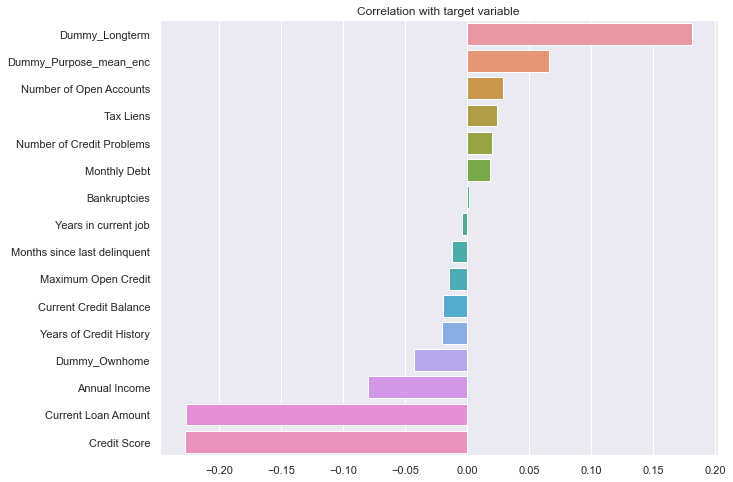

In [39]:
corr_with_target = df_train[NUM_FEATURE_NAMES + ENCODED_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title('Correlation with target variable');

Наиболее коррелируют с целевой переменной по-прежнему Credit Score, Annual Income и Current Load Amount, взаимосвязь с длительностью кредита после кодирования категориальных переменных тоже сохранилась

### Data standartization

In [40]:
scaler = StandardScaler()

df_norm = df_train.copy()
df_norm_test = df_test.copy()

df_norm[NUM_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUM_FEATURE_NAMES])
df_norm_test[NUM_FEATURE_NAMES] = scaler.fit_transform(df_norm_test[NUM_FEATURE_NAMES])

In [41]:
df_norm_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Home Ownership                2500 non-null   category
 1   Purpose                       2500 non-null   category
 2   Term                          2500 non-null   category
 3   Annual Income                 2500 non-null   float64 
 4   Years in current job          2500 non-null   float64 
 5   Tax Liens                     2500 non-null   float64 
 6   Number of Open Accounts       2500 non-null   float64 
 7   Years of Credit History       2500 non-null   float64 
 8   Maximum Open Credit           2500 non-null   float64 
 9   Number of Credit Problems     2500 non-null   float64 
 10  Months since last delinquent  2500 non-null   float64 
 11  Bankruptcies                  2500 non-null   float64 
 12  Current Loan Amount           2500 non-null   fl

# MODEL SELECTION

In [42]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

### Train-test split

In [43]:
X_enc = df_norm[NUM_FEATURE_NAMES + ENCODED_FEATURE_NAMES]
X_cat = df_norm[NUM_FEATURE_NAMES + CAT_FEATURE_NAMES]

X_enc_test = df_norm_test[NUM_FEATURE_NAMES + ENCODED_FEATURE_NAMES]
X_cat_test = df_norm_test[NUM_FEATURE_NAMES + CAT_FEATURE_NAMES]

y = df_norm[TARGET_NAME]

In [44]:
X_enc_train, X_enc_valid, y_enc_train, y_enc_valid = train_test_split(X_enc, y, shuffle = True, test_size = 0.30, random_state = 42)
X_enc_train.shape, X_enc_valid.shape, y_enc_train.shape, y_enc_valid.shape 

((5250, 16), (2250, 16), (5250,), (2250,))

In [45]:
X_cat_train, X_cat_valid, y_cat_train, y_cat_valid = train_test_split(X_cat, y, shuffle = True, test_size = 0.30, random_state = 42)
X_cat_train.shape, X_cat_valid.shape, y_cat_train.shape, y_cat_valid.shape 

((5250, 16), (2250, 16), (5250,), (2250,))

## Logistic Regression

In [46]:
%%time

model_lr = LogisticRegression(random_state = 42)
model_lr.fit(X_enc_train, y_enc_train)

y_enc_train_pred = model_lr.predict(X_enc_train)
y_enc_valid_pred = model_lr.predict(X_enc_valid)

get_classification_report(y_enc_train, y_enc_train_pred, y_enc_valid, y_enc_valid_pred)

TRAIN

              precision    recall  f1-score   support

         0.0       0.75      0.95      0.83      3795
         1.0       0.53      0.16      0.25      1455

    accuracy                           0.73      5250
   macro avg       0.64      0.55      0.54      5250
weighted avg       0.69      0.73      0.67      5250

TEST

              precision    recall  f1-score   support

         0.0       0.73      0.94      0.83      1592
         1.0       0.56      0.17      0.27       658

    accuracy                           0.72      2250
   macro avg       0.65      0.56      0.55      2250
weighted avg       0.68      0.72      0.66      2250

CONFUSION MATRIX

col_0            0.0  1.0
Credit Default           
0.0             1504   88
1.0              544  114
Wall time: 64.8 ms


## RandomForestClassifier

In [47]:
%%time

model_rf = RandomForestClassifier(random_state = 42)
model_rf.fit(X_enc_train, y_enc_train)

y_enc_train_pred = model_rf.predict(X_enc_train)
y_enc_valid_pred = model_rf.predict(X_enc_valid)

get_classification_report(y_enc_train, y_enc_train_pred, y_enc_valid, y_enc_valid_pred)

TRAIN

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3795
         1.0       1.00      1.00      1.00      1455

    accuracy                           1.00      5250
   macro avg       1.00      1.00      1.00      5250
weighted avg       1.00      1.00      1.00      5250

TEST

              precision    recall  f1-score   support

         0.0       0.77      0.92      0.84      1592
         1.0       0.63      0.33      0.43       658

    accuracy                           0.75      2250
   macro avg       0.70      0.62      0.63      2250
weighted avg       0.73      0.75      0.72      2250

CONFUSION MATRIX

col_0            0.0  1.0
Credit Default           
0.0             1462  130
1.0              441  217
Wall time: 938 ms


## XGBoost

In [48]:
%%time

model_xgb = xgb.XGBClassifier(random_state = 42)
model_xgb.fit(X_enc_train, y_enc_train)

y_enc_train_pred = model_xgb.predict(X_enc_train)
y_enc_valid_pred = model_xgb.predict(X_enc_valid)

get_classification_report(y_enc_train, y_enc_train_pred, y_enc_valid, y_enc_valid_pred)

TRAIN

              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86      3795
         1.0       0.71      0.39      0.51      1455

    accuracy                           0.79      5250
   macro avg       0.76      0.67      0.68      5250
weighted avg       0.78      0.79      0.76      5250

TEST

              precision    recall  f1-score   support

         0.0       0.77      0.92      0.84      1592
         1.0       0.62      0.32      0.43       658

    accuracy                           0.74      2250
   macro avg       0.69      0.62      0.63      2250
weighted avg       0.72      0.74      0.72      2250

CONFUSION MATRIX

col_0            0.0  1.0
Credit Default           
0.0             1462  130
1.0              445  213
Wall time: 314 ms


## CatBoost

In [49]:
%%time

model_catb = catb.CatBoostClassifier(silent = True, random_state = 42)
model_catb.fit(X_enc_train, y_enc_train)

y_enc_train_pred = model_catb.predict(X_enc_train)
y_enc_valid_pred = model_catb.predict(X_enc_valid)

get_classification_report(y_enc_train, y_enc_train_pred, y_enc_valid, y_enc_valid_pred)

TRAIN

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      3795
         1.0       0.94      0.65      0.77      1455

    accuracy                           0.89      5250
   macro avg       0.91      0.82      0.85      5250
weighted avg       0.90      0.89      0.88      5250

TEST

              precision    recall  f1-score   support

         0.0       0.77      0.92      0.84      1592
         1.0       0.65      0.33      0.44       658

    accuracy                           0.75      2250
   macro avg       0.71      0.63      0.64      2250
weighted avg       0.73      0.75      0.72      2250

CONFUSION MATRIX

col_0            0.0  1.0
Credit Default           
0.0             1472  120
1.0              438  220
Wall time: 3.58 s


In [50]:
%%time

model_catb = catb.CatBoostClassifier(silent = True, random_state = 42)
model_catb.fit(X_cat_train, y_cat_train, cat_features = CAT_FEATURE_NAMES)

y_cat_train_pred = model_catb.predict(X_cat_train)
y_cat_valid_pred = model_catb.predict(X_cat_valid)

get_classification_report(y_cat_train, y_cat_train_pred, y_cat_valid, y_cat_valid_pred)

TRAIN

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92      3795
         1.0       0.93      0.60      0.73      1455

    accuracy                           0.88      5250
   macro avg       0.90      0.79      0.83      5250
weighted avg       0.89      0.88      0.87      5250

TEST

              precision    recall  f1-score   support

         0.0       0.77      0.92      0.84      1592
         1.0       0.64      0.34      0.45       658

    accuracy                           0.75      2250
   macro avg       0.71      0.63      0.64      2250
weighted avg       0.73      0.75      0.72      2250

CONFUSION MATRIX

col_0            0.0  1.0
Credit Default           
0.0             1466  126
1.0              433  225
Wall time: 14.9 s


## LightGBM

In [51]:
%%time

model_lgbm = lgbm.LGBMClassifier(random_state = 42)
model_lgbm.fit(X_enc_train, y_enc_train)

y_enc_train_pred = model_lgbm.predict(X_enc_train)
y_enc_valid_pred = model_lgbm.predict(X_enc_valid)

get_classification_report(y_enc_train, y_enc_train_pred, y_enc_valid, y_enc_valid_pred)

TRAIN

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      3795
         1.0       0.97      0.75      0.84      1455

    accuracy                           0.92      5250
   macro avg       0.94      0.87      0.90      5250
weighted avg       0.93      0.92      0.92      5250

TEST

              precision    recall  f1-score   support

         0.0       0.78      0.90      0.83      1592
         1.0       0.61      0.37      0.46       658

    accuracy                           0.75      2250
   macro avg       0.69      0.64      0.65      2250
weighted avg       0.73      0.75      0.73      2250

CONFUSION MATRIX

col_0            0.0  1.0
Credit Default           
0.0             1436  156
1.0              414  244
Wall time: 246 ms


In [52]:
%%time

model_lgbm = lgbm.LGBMClassifier(random_state = 42)
model_lgbm.fit(X_cat_train, y_cat_train, categorical_feature = CAT_FEATURE_NAMES)

y_cat_train_pred = model_lgbm.predict(X_cat_train)
y_cat_valid_pred = model_lgbm.predict(X_cat_valid)

get_classification_report(y_cat_train, y_cat_train_pred, y_cat_valid, y_cat_valid_pred)

C:\Users\snetkova\Anaconda3\lib\site-packages\lightgbm\basic.py:1247: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Home Ownership', 'Purpose', 'Term']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


TRAIN

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      3795
         1.0       0.97      0.75      0.85      1455

    accuracy                           0.92      5250
   macro avg       0.94      0.87      0.90      5250
weighted avg       0.93      0.92      0.92      5250

TEST

              precision    recall  f1-score   support

         0.0       0.78      0.91      0.84      1592
         1.0       0.63      0.37      0.47       658

    accuracy                           0.75      2250
   macro avg       0.70      0.64      0.65      2250
weighted avg       0.73      0.75      0.73      2250

CONFUSION MATRIX

col_0            0.0  1.0
Credit Default           
0.0             1450  142
1.0              415  243
Wall time: 321 ms


С дефолтными настройками лучший результат у LightGBM при кодировании категориальных переменных на стороне алгоритма

In [53]:
def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(0.1, 0.9, 9):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
      
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.axhline(0.5, color="red")
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, -1.3, 1, 1])

    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=0.5)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()

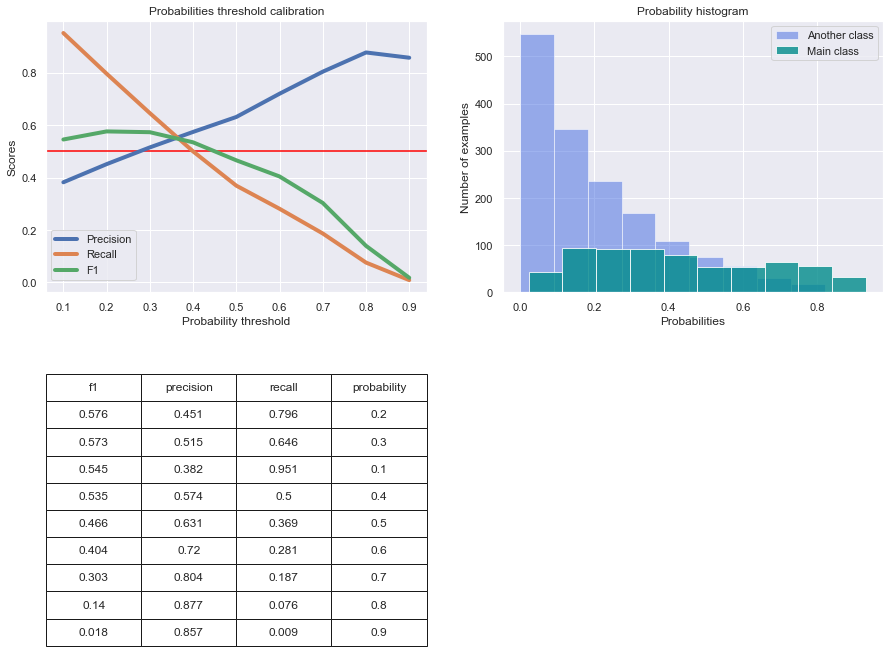

In [54]:
y_cat_valid_pred_probs = model_lgbm.predict_proba(X_cat_valid)[:, 1]
show_proba_calibration_plots(y_cat_valid_pred_probs, y_cat_valid)

# MODEL TUNING

## params explore

In [55]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 42)
    scores = cross_val_score(model, X, y, scoring = 'f1', cv = cv, n_jobs = -1)
    return scores

### n_estimators

In [56]:
def get_models_estimators():
    models = dict()
    trees = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
    for n in trees:
        models[str(n)] = lgbm.LGBMClassifier(n_estimators = n, random_state = 42)
    return models

In [57]:
# models = get_models_estimators()
# results, names = list(), list()

# for name, model in models.items():
#     scores = evaluate_model(model, X_cat_train, y_cat_train)
#     results.append(scores)
#     names.append(name)
#     print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

Количество деревьев будем искать в районе 100-1000

### max_depth

In [58]:
def get_models_depth():
    models = dict()
    for i in range(5, 15):
        models[str(i)] = lgbm.LGBMClassifier(max_depth = i, n_estimators = 500, random_state = 42)
    return models

In [59]:
# models = get_models_depth()
# results, names = list(), list()

# for name, model in models.items():
#     scores = evaluate_model(model, X_cat_train, y_cat_train)
#     results.append(scores)
#     names.append(name)
#     print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

Глубину дерева будем искать в промежутке от 7 до 15

### learning rate

In [60]:
def get_models_rate():
    models = dict()
    rates = [0.0001, 0.001, 0.01, 0.075, 0.1, 0.15, 0.5, 1.0]
    for r in rates:
        models[str(r)] = lgbm.LGBMClassifier(learning_rate = r, max_depth = 7, n_estimators = 500, random_state = 42)
    return models

In [61]:
# models = get_models_rate()
# results, names = list(), list()

# for name, model in models.items():
#     scores = evaluate_model(model, X_cat_train, y_cat_train)
#     results.append(scores)
#     names.append(name)
#     print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

default learning rate 0.1

### boosting method

In [62]:
def get_models_type():
    models = dict()
    types = ['gbdt', 'dart', 'goss']
    for t in types:
        models[t] = lgbm.LGBMClassifier(boosting_type = t, max_depth = 7, n_estimators = 500, random_state = 42)
    return models

In [63]:
# models = get_models_type()
# results, names = list(), list()

# for name, model in models.items():
#     scores = evaluate_model(model, X_cat_train, y_cat_train)
#     results.append(scores)
#     names.append(name)
#     print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

Лучший результат у gbdt

## Cross validation

In [64]:
model_lgbm = lgbm.LGBMClassifier(random_state = 42, boosting_type = 'gbdt')

In [65]:
params = {
    'max_depth': [7, 8, 9, 10, 11, 12, 13, 14, 15],
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
}

In [66]:
cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5, random_state = 42)
grid_cv = GridSearchCV(model_lgbm, params, n_jobs = -1, scoring = 'f1', cv = cv, verbose = 10)

In [67]:
# %%time
# grid_cv.fit(X = X_cat_train, y = y_cat_train, eval_set = (X_cat_valid, y_cat_valid), categorical_feature = CAT_FEATURE_NAMES)

In [68]:
# grid_cv.best_params_

In [69]:
# grid_cv.best_score_

### model

In [70]:
model_lgbm = lgbm.LGBMClassifier(max_depth = 10, n_estimators = 400, random_state = 42)
model_lgbm.fit(X_cat_train, y_cat_train, categorical_feature = CAT_FEATURE_NAMES)

y_cat_train_pred = model_lgbm.predict(X_cat_train)
y_cat_valid_pred = model_lgbm.predict(X_cat_valid)

get_classification_report(y_cat_train, y_cat_train_pred, y_cat_valid, y_cat_valid_pred)

C:\Users\snetkova\Anaconda3\lib\site-packages\lightgbm\basic.py:1247: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Home Ownership', 'Purpose', 'Term']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


TRAIN

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3795
         1.0       1.00      1.00      1.00      1455

    accuracy                           1.00      5250
   macro avg       1.00      1.00      1.00      5250
weighted avg       1.00      1.00      1.00      5250

TEST

              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84      1592
         1.0       0.62      0.41      0.49       658

    accuracy                           0.75      2250
   macro avg       0.70      0.65      0.66      2250
weighted avg       0.74      0.75      0.74      2250

CONFUSION MATRIX

col_0            0.0  1.0
Credit Default           
0.0             1426  166
1.0              390  268


Модель получилась переобучена, пробуем подобрать num_leaves

#### bagging

In [71]:
def get_models_bagging():
    models = dict()
    for k in np.arange(25, 45, 5):
        for n in np.arange(0, 1, 0.1):
            models[str(k) + ' ' + str(n)] = lgbm.LGBMClassifier(bagging_freq = k, bagging_fraction = n, max_depth = 10, n_estimators = 400, random_state = 42)
    return models

In [72]:
# models = get_models_bagging()
# results, names = list(), list()

# for name, model in models.items():
#     scores = evaluate_model(model, X_cat_train, y_cat_train)
#     results.append(scores)
#     names.append(name)
#     print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

### num_leaves

In [73]:
def get_models_leaf():
    models = dict()
    for n in [2 ** 3, 2 ** 4, 2 ** 5, 2 ** 6, 2 ** 7, 2 ** 8, 2 ** 9, 2 ** 10]:
        models[str(n)] = lgbm.LGBMClassifier(num_leaves = n, bagging_freq = 30, bagging_fraction = 0.9, max_depth = 10, n_estimators = 400, random_state = 42)
    return models

In [74]:
# models = get_models_leaf()
# results, names = list(), list()

# for name, model in models.items():
#     scores = evaluate_model(model, X_cat_train, y_cat_train)
#     results.append(scores)
#     names.append(name)
#     print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

In [75]:
model_lgbm = lgbm.LGBMClassifier(num_leaves = 16, bagging_freq = 30, bagging_fraction = 0.9, max_depth = 10, n_estimators = 400, random_state = 42)
model_lgbm.fit(X_cat_train, y_cat_train, categorical_feature = CAT_FEATURE_NAMES)

y_cat_train_pred = model_lgbm.predict(X_cat_train)
y_cat_valid_pred = model_lgbm.predict(X_cat_valid)

get_classification_report(y_cat_train, y_cat_train_pred, y_cat_valid, y_cat_valid_pred)

C:\Users\snetkova\Anaconda3\lib\site-packages\lightgbm\basic.py:1247: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Home Ownership', 'Purpose', 'Term']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


TRAIN

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      3795
         1.0       0.99      0.91      0.95      1455

    accuracy                           0.97      5250
   macro avg       0.98      0.95      0.97      5250
weighted avg       0.97      0.97      0.97      5250

TEST

              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83      1592
         1.0       0.59      0.39      0.47       658

    accuracy                           0.74      2250
   macro avg       0.68      0.64      0.65      2250
weighted avg       0.72      0.74      0.72      2250

CONFUSION MATRIX

col_0            0.0  1.0
Credit Default           
0.0             1415  177
1.0              402  256


улучшений нет

#### regularization

In [76]:
def get_models_l1():
    models = dict()
    for alpha in range(-2, 5):
        models[str(alpha)] = lgbm.LGBMClassifier(reg_alpha = 10 ** alpha, num_leaves = 16, bagging_freq = 30, bagging_fraction = 0.9, max_depth = 10, n_estimators = 400, random_state = 42)
    return models

In [77]:
models = get_models_l1()
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model, X_cat_train, y_cat_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>-2 0.479 (0.037)
>-1 0.474 (0.029)
>0 0.474 (0.035)
>1 0.446 (0.034)
>2 0.000 (0.000)
>3 0.000 (0.000)
>4 0.000 (0.000)


In [78]:
def get_models_l2():
    models = dict()
    for lamb in range(-5, 5):
        models[str(lamb)] = lgbm.LGBMClassifier(reg_lambda = 10 ** lamb, num_leaves = 16, bagging_freq = 30, bagging_fraction = 0.9, max_depth = 10, n_estimators = 400, random_state = 42)
    return models

In [79]:
models = get_models_l2()
results, names = list(), list()

for name, model in models.items():
    scores = evaluate_model(model, X_cat_train, y_cat_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>-5 0.478 (0.034)
>-4 0.476 (0.035)
>-3 0.472 (0.038)
>-2 0.471 (0.035)
>-1 0.473 (0.033)
>0 0.474 (0.029)
>1 0.460 (0.033)
>2 0.457 (0.032)
>3 0.433 (0.022)
>4 0.000 (0.000)


### FINAL MODEL

In [80]:
model_lgbm = lgbm.LGBMClassifier(reg_alpha = 10 ** (-2), num_leaves = 16, bagging_freq = 30, bagging_fraction = 0.9, max_depth = 10, n_estimators = 400, random_state = 42)
model_lgbm.fit(X_cat_train, y_cat_train, categorical_feature = CAT_FEATURE_NAMES)

y_cat_train_pred = model_lgbm.predict(X_cat_train)
y_cat_valid_pred = model_lgbm.predict(X_cat_valid)

get_classification_report(y_cat_train, y_cat_train_pred, y_cat_valid, y_cat_valid_pred)

C:\Users\snetkova\Anaconda3\lib\site-packages\lightgbm\basic.py:1247: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Home Ownership', 'Purpose', 'Term']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


TRAIN

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      3795
         1.0       0.99      0.91      0.95      1455

    accuracy                           0.97      5250
   macro avg       0.98      0.95      0.97      5250
weighted avg       0.97      0.97      0.97      5250

TEST

              precision    recall  f1-score   support

         0.0       0.78      0.90      0.83      1592
         1.0       0.61      0.39      0.48       658

    accuracy                           0.75      2250
   macro avg       0.70      0.64      0.66      2250
weighted avg       0.73      0.75      0.73      2250

CONFUSION MATRIX

col_0            0.0  1.0
Credit Default           
0.0             1427  165
1.0              400  258


Переобучение немного снизилось

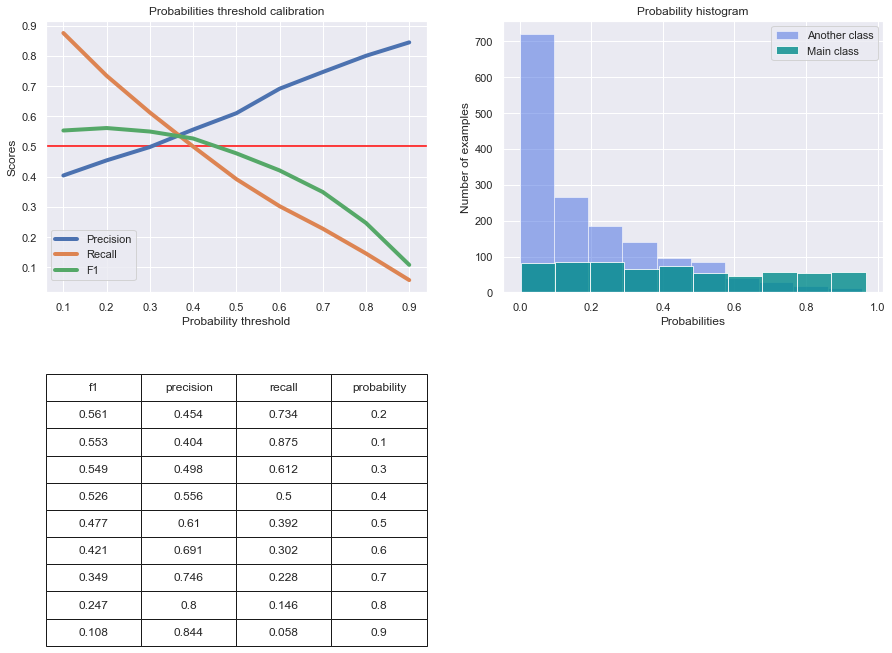

In [81]:
y_cat_valid_pred_probs = model_lgbm.predict_proba(X_cat_valid)[:, 1]
show_proba_calibration_plots(y_cat_valid_pred_probs, y_cat_valid)

In [82]:
pd.concat([pd.Series(model_lgbm.feature_importances_), pd.Series(X_cat_train.columns)], axis = 1)

,0,1
0,664,Annual Income
1,248,Years in current job
2,20,Tax Liens
3,329,Number of Open Accounts
4,705,Years of Credit History
5,577,Maximum Open Credit
6,32,Number of Credit Problems
7,295,Months since last delinquent
8,21,Bankruptcies
9,723,Current Loan Amount


In [83]:
y_cat_valid_pred_probs

array([1.35137267e-01, 2.69471805e-02, 1.57284636e-01, ...,
       1.90496008e-01, 1.16603427e-01, 1.83601320e-04])

In [84]:
y_valid_pred = (y_cat_valid_pred_probs >= 0.375).astype('int')

In [85]:
pd.Series(y_valid_pred).value_counts(normalize=True)

0    0.715111
1    0.284889
dtype: float64

In [86]:
get_classification_report(y_cat_train, y_cat_train_pred, y_cat_valid, y_valid_pred)

TRAIN

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      3795
         1.0       0.99      0.91      0.95      1455

    accuracy                           0.97      5250
   macro avg       0.98      0.95      0.97      5250
weighted avg       0.97      0.97      0.97      5250

TEST

              precision    recall  f1-score   support

         0.0       0.81      0.82      0.81      1592
         1.0       0.54      0.53      0.54       658

    accuracy                           0.73      2250
   macro avg       0.68      0.67      0.67      2250
weighted avg       0.73      0.73      0.73      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0.0             1300  292
1.0              309  349


# PREDICTION

In [87]:
y_test_pred_probs = model_lgbm.predict_proba(X_cat_test)

In [88]:
y_test_pred_probs[:, 1]

array([0.11955723, 0.23249473, 0.07316099, ..., 0.09275554, 0.10382695,
       0.17003066])

In [89]:
y_test_pred = (y_test_pred_probs[:, 1] >= 0.375).astype('int')
pd.Series(y_test_pred)

0       0
1       0
2       0
3       0
4       1
       ..
2495    0
2496    0
2497    0
2498    0
2499    0
Length: 2500, dtype: int32

In [90]:
pd.Series(y_test_pred).value_counts(normalize=True)

0    0.7948
1    0.2052
dtype: float64

In [91]:
pd.Series(y_test_pred).to_csv(OUTPUTH_PATH, index = False, header = False)